In [1]:
import xarray as xr
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cmocean.cm as cm
import datetime as dt
import matplotlib.patches as mpatches
from matplotlib.colors import LogNorm
import pickle 
import os
from salishsea_tools import viz_tools, geo_tools
import arrow
import copy
import math
import matplotlib.dates as mdates

from salishsea_tools import visualisations as vis
from salishsea_tools import viz_tools

In [2]:
mycmap = copy.copy(cm.oxy)
mycmap.set_bad('darkgreen')

In [3]:

lonSI1 = -123.58
lonSI2 = -123.44
latSI1 = 48.5
latSI2 = 48.695

In [4]:
# SalishSeaCast config 
df_chemold = xr.open_dataset('/ocean/atall/MOAD/Model/runs/salishseacast/long_run/SalishSea_1d_chemo2_20180101_20181231.nc') # 

# SalishSea_oxy config
df_chemnew = xr.open_mfdataset('/ocean/atall/MOAD/Model/runs/salishsea_oxy/long_run/oxygen_PONref90/SalishSea_1d_oxy_*')
df_chemnewb = xr.open_mfdataset('/ocean/sallen/timbucktwo/oxygen/*sep18/SalishSea_1d_*_chem_T.nc')
df_diagnew = xr.open_mfdataset('/ocean/sallen/timbucktwo/oxygen/*sep18/SalishSea_1d_*_diag_T.nc')


In [5]:
# Constant and data rang
kk, jj, ii = 27, 353, 209 # Patricia bay 
kks, jjs, iis = 34, 423, 266 # SoG Central node
syear = 2018
eyear = 2018
smonth = 1
emonth = 12
startdate = arrow.get(syear, smonth, 1)
enddate = arrow.get(eyear, emonth, 31)


In [6]:
np.array(df_chemnew.dissolved_oxygen[0,:,jjs,iis])

array([291.88278, 291.42526, 294.52826, 294.8292 , 288.87573, 280.00797,
       268.1117 , 256.8824 , 249.47928, 243.07803, 238.67435, 234.99033,
       231.07568, 227.91675, 225.12128, 222.13364, 219.37294, 216.77725,
       214.15866, 211.5357 , 208.42603, 205.0938 , 203.58553, 201.69568,
       200.1887 , 188.81126, 165.49776, 157.16911, 147.76717, 140.75482,
       133.2716 , 128.3527 , 125.02088, 124.3092 , 123.47489,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ], dtype=float32)

# Oxygen diff between SalishSeaCast and SalishSea_oxy (new config)

In [18]:
o2diff = df_chemnew.dissolved_oxygen[:,:kk,jj,ii] - df_chemold.dissolved_oxygen[6:,:kk,jj,ii]
o2diffs = df_chemnew.dissolved_oxygen[:,:kks,jjs,iis] - df_chemold.dissolved_oxygen[6:,:kks,jjs,iis]

Text(0.5, 1.0, 'Ref90 - 202111')

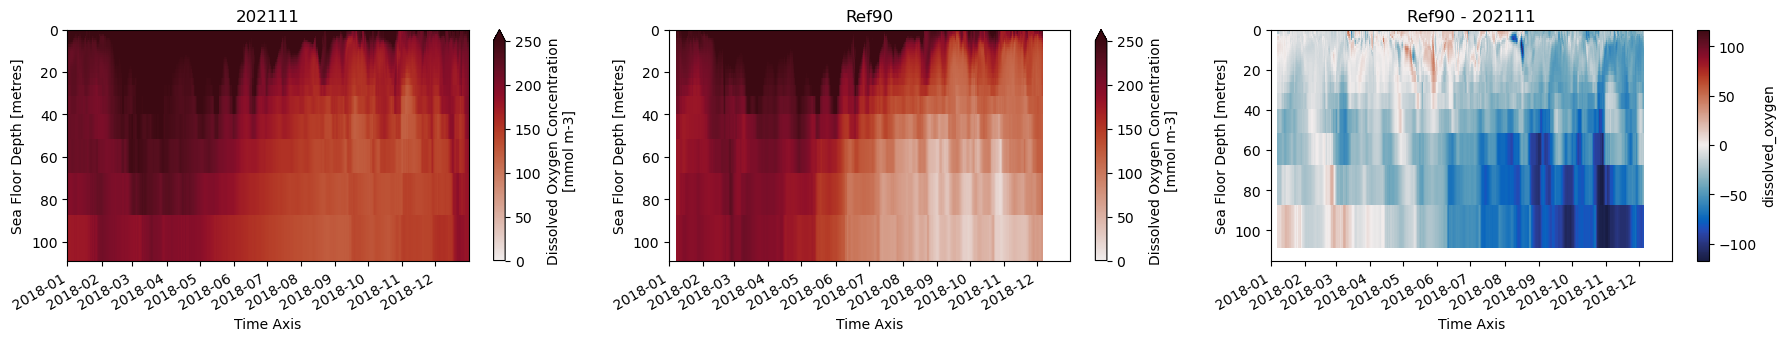

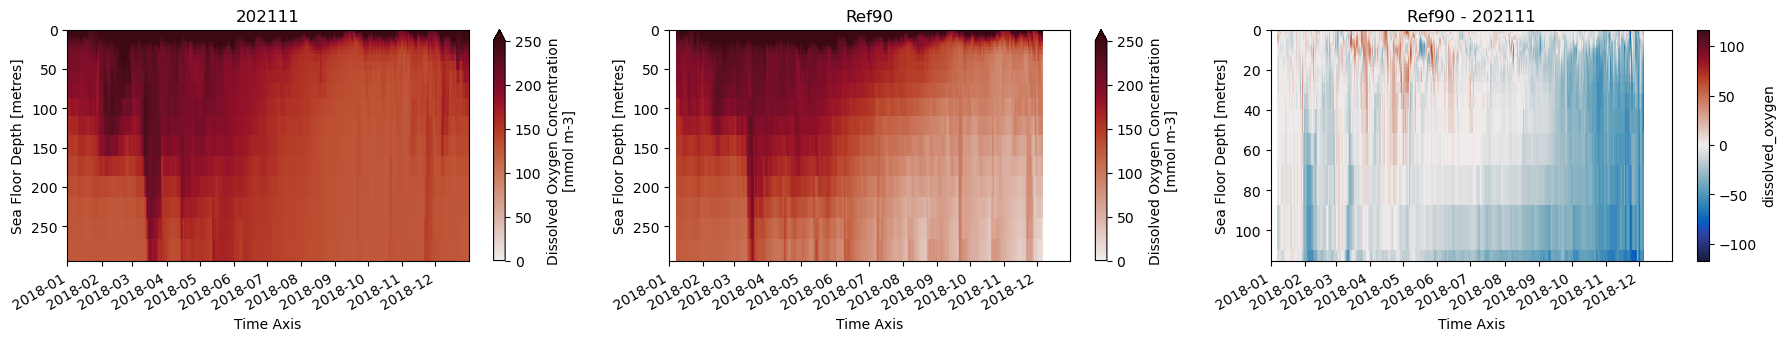

In [20]:
fig, ax = plt.subplots(1, 3, figsize = (22, 3)) 
df_chemold.dissolved_oxygen[:,:kk,jj,ii].plot(ax=ax[0], y="depth", yincrease=False, cmap=cm.amp, vmin=0, vmax=250, xlim=(startdate, enddate));
df_chemnew.dissolved_oxygen[:,:kk,jj,ii].plot(ax=ax[1], y="depth", yincrease=False, cmap=cm.amp, vmin=0, vmax=250, xlim=(startdate, enddate));
o2diff.plot(ax=ax[2], y="depth", yincrease=False, cmap=cm.balance, ylim=(115, 0), xlim=(startdate, enddate));

ax[0].set_title('202111')
ax[1].set_title('Ref90')
ax[2].set_title('Ref90 - 202111')

fig, ax = plt.subplots(1, 3, figsize = (22, 3)) 
df_chemold.dissolved_oxygen[:,:kks,jjs,iis].plot(ax=ax[0], y="depth", yincrease=False, cmap=cm.amp, vmin=0, vmax=250, xlim=(startdate, enddate));
df_chemnew.dissolved_oxygen[:,:kks,jjs,iis].plot(ax=ax[1], y="depth", yincrease=False, cmap=cm.amp, vmin=0, vmax=250, xlim=(startdate, enddate));
o2diffs.plot(ax=ax[2], y="depth", yincrease=False, cmap=cm.balance, ylim=(115, 0), xlim=(startdate, enddate));

ax[0].set_title('202111')
ax[1].set_title('Ref90')
ax[2].set_title('Ref90 - 202111')


# Oxygen budget in the new Config

In [19]:
df_diagnew

<xarray.Dataset>
Dimensions:               (y_grid_T: 898, x_grid_T: 398, time_counter: 30,
                           nvertex_grid_T: 4, deptht: 40, axis_nbounds: 2,
                           y_grid_W: 898, x_grid_W: 398, nvertex_grid_W: 4,
                           depthw: 40)
Coordinates:
    nav_lat_grid_T        (y_grid_T, x_grid_T) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
    nav_lon_grid_T        (y_grid_T, x_grid_T) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
  * deptht                (deptht) float32 0.5 1.5 2.5 3.5 ... 387.6 414.5 441.5
    nav_lat_grid_W        (y_grid_W, x_grid_W) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
    nav_lon_grid_W        (y_grid_W, x_grid_W) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
  * depthw                (depthw) float32 0.0 1.0 2.0 3.0 ... 374.1 401.1 428.0
    time_centered         (time_counter) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter          (time_counter) datetime64[ns] 2018-09-01T12:00:00 ....
Dimensions without coordinates: y_grid_T, x_grid_T, nvertex_grid_T,
                                axis_nbounds, y_grid_W, x_grid_W, nvertex_grid_W
Data variables: (12/20)
    bounds_lon_grid_T     (time_counter, y_grid_T, x_grid_T, nvertex_grid_T) float32 dask.array<chunksize=(1, 898, 398, 4), meta=np.ndarray>
    bounds_lat_grid_T     (time_counter, y_grid_T, x_grid_T, nvertex_grid_T) float32 dask.array<chunksize=(1, 898, 398, 4), meta=np.ndarray>
    area_grid_T           (time_counter, y_grid_T, x_grid_T) float32 dask.array<chunksize=(1, 898, 398), meta=np.ndarray>
    deptht_bounds         (time_counter, deptht, axis_nbounds) float32 dask.array<chunksize=(1, 40, 2), meta=np.ndarray>
    bounds_lon_grid_W     (time_counter, y_grid_W, x_grid_W, nvertex_grid_W) float32 dask.array<chunksize=(1, 898, 398, 4), meta=np.ndarray>
    bounds_lat_grid_W     (time_counter, y_grid_W, x_grid_W, nvertex_grid_W) float32 dask.array<chunksize=(1, 898, 398, 4), meta=np.ndarray>
    ...                    ...
    NPP                   (time_counter, deptht, y_grid_T, x_grid_T) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    RPP                   (time_counter, deptht, y_grid_T, x_grid_T) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    NITR                  (time_counter, deptht, y_grid_T, x_grid_T) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    RMIN                  (time_counter, deptht, y_grid_T, x_grid_T) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    RMIC                  (time_counter, deptht, y_grid_T, x_grid_T) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    RMES                  (time_counter, deptht, y_grid_T, x_grid_T) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
Attributes:
    name:         SalishSea_1d_20180901_20180905
    description:  diagnostic terms of DO
    title:        diagnostic terms of DO
    Conventions:  CF-1.6
    timeStamp:    2024-Jun-18 00:00:07 GMT
    uuid:         efef69a0-83a6-49f1-88bc-bad2baf82446

In [7]:
sinks_o2 = (df_diagnew.NITR + df_diagnew.RMIN + df_diagnew.RMIC + df_diagnew.RMES) #* 86400
sourc_o2 = (df_diagnew.NPP + df_diagnew.RPP) #* 86400
sms_o2 = sinks_o2 + sourc_o2

Sinks Biological Terms


Text(0.5, 1.0, 'RegPP')

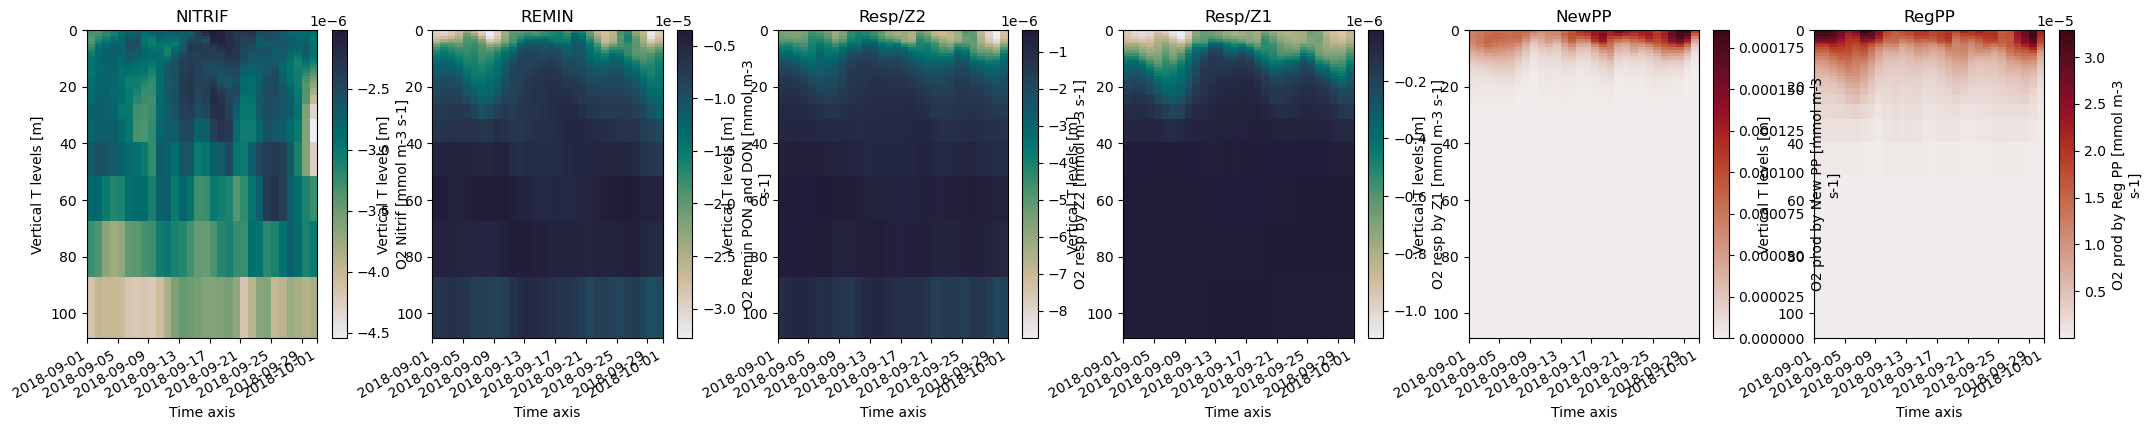

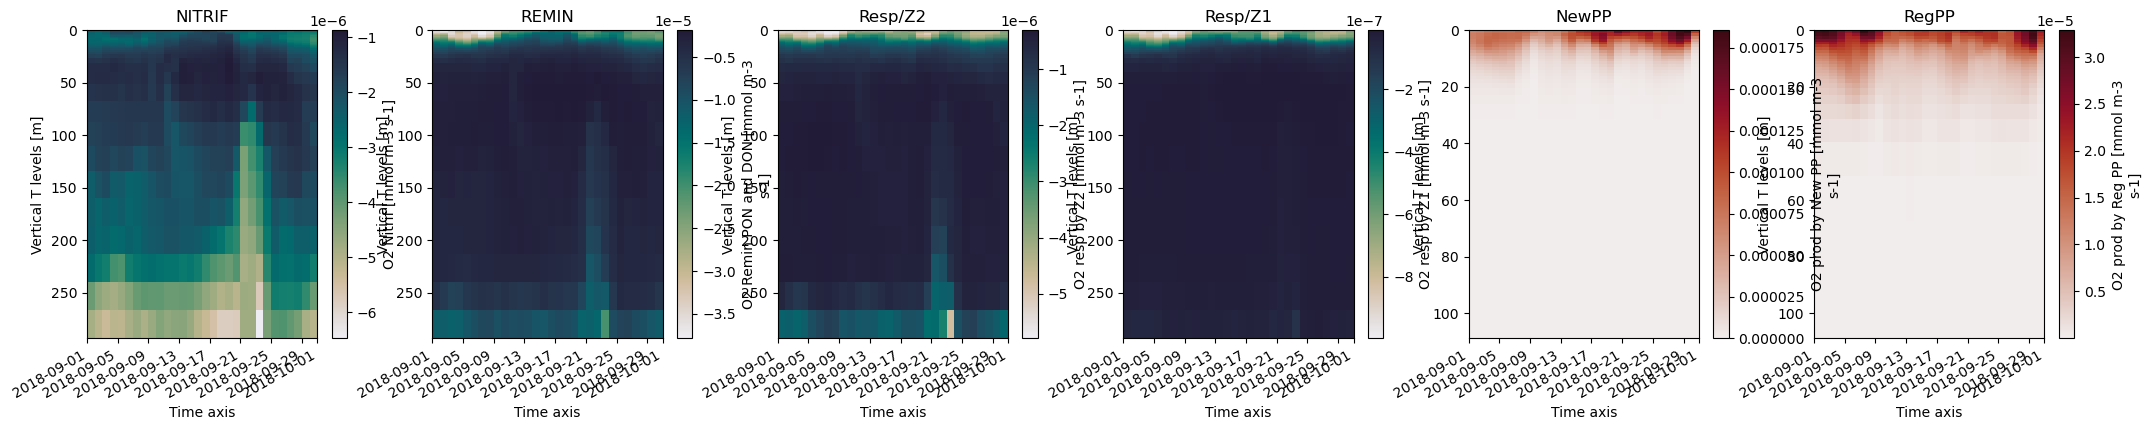

In [22]:
print('Sinks Biological Terms')
fig, ax = plt.subplots(1, 6, figsize = (26, 4)) 
df_diagnew.NITR[:,:kk,jj,ii].plot(ax=ax[0], y="deptht", yincrease=False, cmap=cm.rain);
df_diagnew.RMIN[:,:kk,jj,ii].plot(ax=ax[1], y="deptht", yincrease=False, cmap=cm.rain);
df_diagnew.RMES[:,:kk,jj,ii].plot(ax=ax[2], y="deptht", yincrease=False, cmap=cm.rain);
df_diagnew.RMIC[:,:kk,jj,ii].plot(ax=ax[3], y="deptht", yincrease=False, cmap=cm.rain);
df_diagnew.NPP[:,:kk,jj,ii].plot(ax=ax[4], y="deptht", yincrease=False, cmap=cm.amp);
df_diagnew.RPP[:,:kk,jj,ii].plot(ax=ax[5], y="deptht", yincrease=False, cmap=cm.amp);
ax[0].set_title('NITRIF')
ax[1].set_title('REMIN')
ax[2].set_title('Resp/Z2')
ax[3].set_title('Resp/Z1')
ax[4].set_title('NewPP')
ax[5].set_title('RegPP')

fig, ax = plt.subplots(1, 6, figsize = (26, 4)) 
df_diagnew.NITR[:,:kks,jjs,iis].plot(ax=ax[0], y="deptht", yincrease=False, cmap=cm.rain);
df_diagnew.RMIN[:,:kks,jjs,iis].plot(ax=ax[1], y="deptht", yincrease=False, cmap=cm.rain);
df_diagnew.RMES[:,:kks,jjs,iis].plot(ax=ax[2], y="deptht", yincrease=False, cmap=cm.rain);
df_diagnew.RMIC[:,:kks,jjs,iis].plot(ax=ax[3], y="deptht", yincrease=False, cmap=cm.rain);
df_diagnew.NPP[:,:kk,jj,ii].plot(ax=ax[4], y="deptht", yincrease=False, cmap=cm.amp);
df_diagnew.RPP[:,:kk,jj,ii].plot(ax=ax[5], y="deptht", yincrease=False, cmap=cm.amp);
ax[0].set_title('NITRIF')
ax[1].set_title('REMIN')
ax[2].set_title('Resp/Z2')
ax[3].set_title('Resp/Z1')
ax[4].set_title('NewPP')
ax[5].set_title('RegPP')

Sources Minus Sinks


Text(0.5, 1.0, 'SMS')

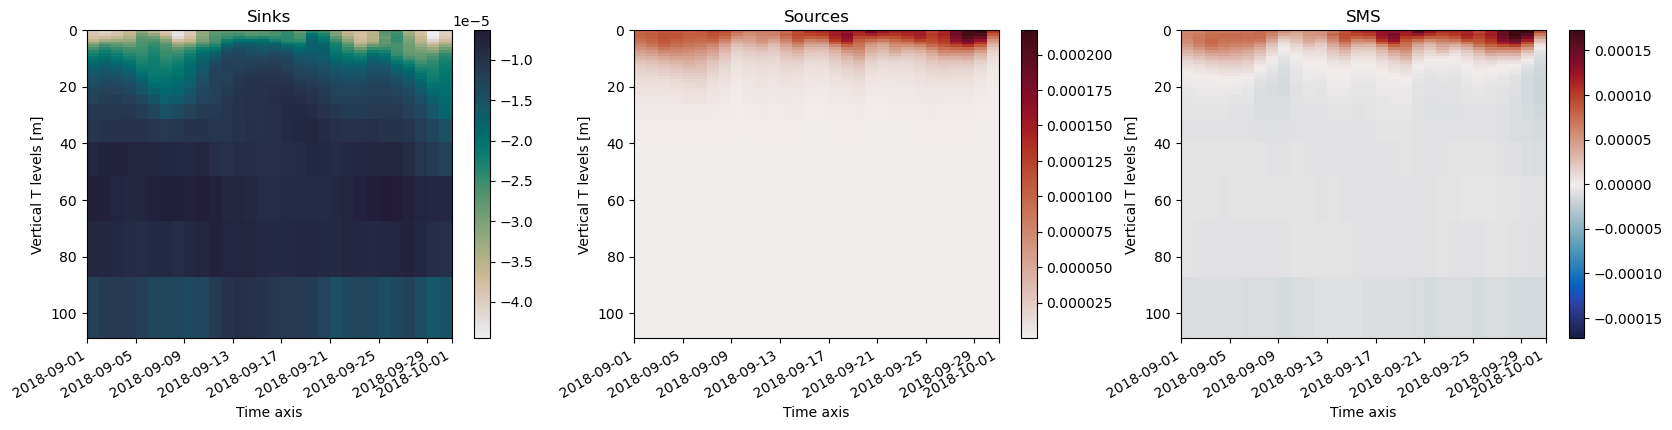

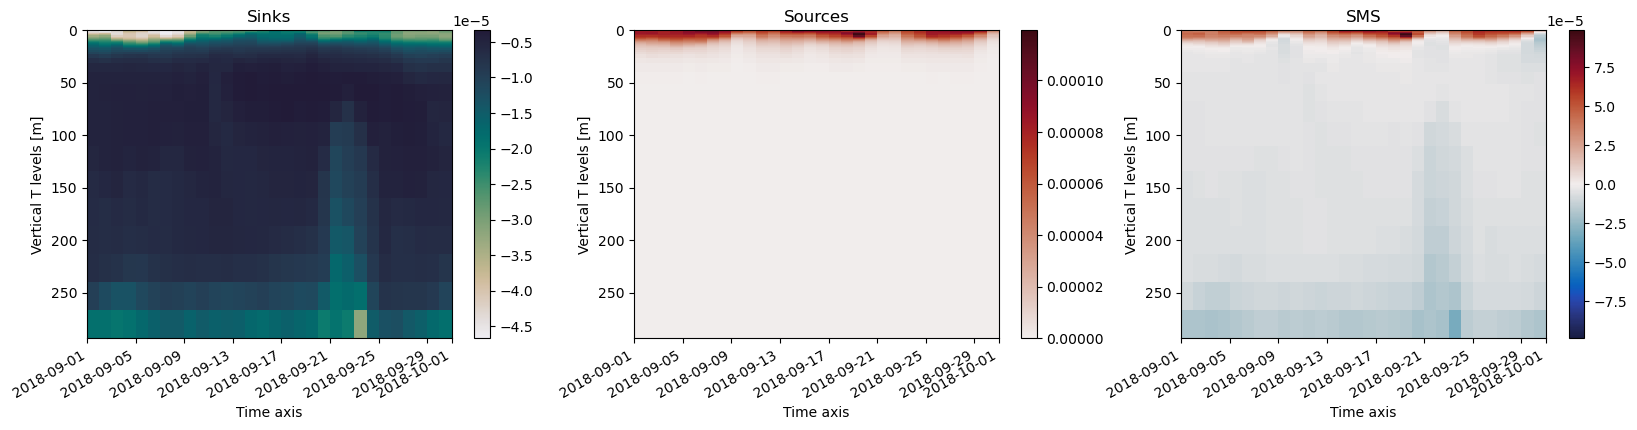

In [23]:
print('Sources Minus Sinks')
fig, ax = plt.subplots(1, 3, figsize = (20, 4)) 
sinks_o2[:,:kk,jj,ii].plot(ax=ax[0], y="deptht", yincrease=False, cmap=cm.rain);
sourc_o2[:,:kk,jj,ii].plot(ax=ax[1], y="deptht", yincrease=False, cmap=cm.amp);
sms_o2[:,:kk,jj,ii].plot(ax=ax[2], y="deptht", yincrease=False, cmap=cm.balance);
ax[0].set_title('Sinks')
ax[1].set_title('Sources')
ax[2].set_title('SMS')

fig, ax = plt.subplots(1, 3, figsize = (20, 4)) 
sinks_o2[:,:kks,jjs,iis].plot(ax=ax[0], y="deptht", yincrease=False, cmap=cm.rain);
sourc_o2[:,:kks,jjs,iis].plot(ax=ax[1], y="deptht", yincrease=False, cmap=cm.amp);
sms_o2[:,:kks,jjs,iis].plot(ax=ax[2], y="deptht", yincrease=False, cmap=cm.balance);
ax[0].set_title('Sinks')
ax[1].set_title('Sources')
ax[2].set_title('SMS')

Physical Terms


Text(0.5, 1.0, 'HDIF')

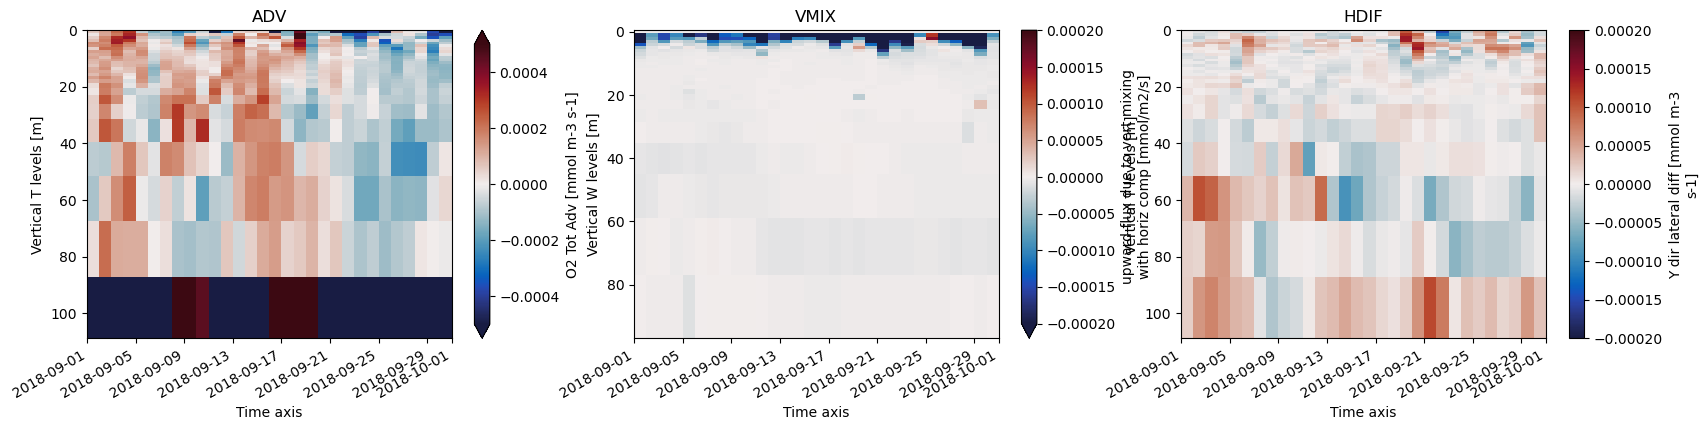

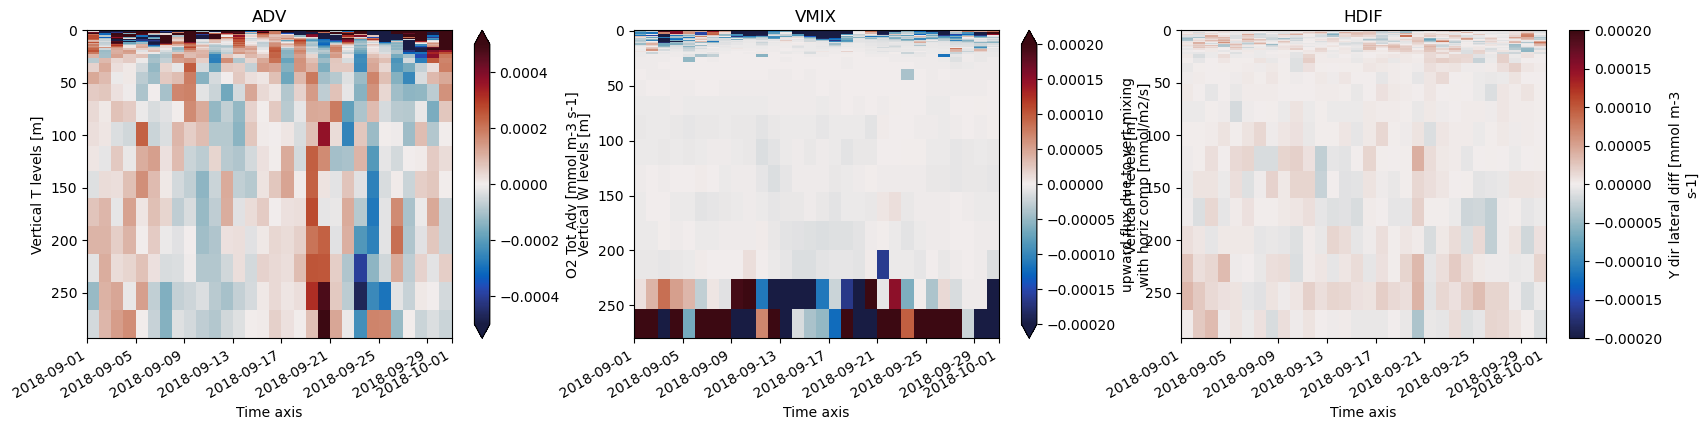

In [33]:
print('Physical Terms')
fig, ax = plt.subplots(1, 3, figsize = (20, 4)) 
df_diagnew.TADV[:,:kk,jj,ii].plot(ax=ax[0], y="deptht", yincrease=False, cmap=cm.balance, vmin=-0.0005, vmax=0.0005);
df_diagnew.VMIX[:,:kk,jj,ii].plot(ax=ax[1], y="depthw", yincrease=False, cmap=cm.balance, vmin=-0.0002, vmax=0.0002);
df_diagnew.HDIF[:,:kk,jj,ii].plot(ax=ax[2], y="deptht", yincrease=False, cmap=cm.balance, vmin=-0.0002, vmax=0.0002);
ax[0].set_title('ADV')
ax[1].set_title('VMIX')
ax[2].set_title('HDIF')

fig, ax = plt.subplots(1, 3, figsize = (20, 4)) 
df_diagnew.TADV[:,:kks,jjs,iis].plot(ax=ax[0], y="deptht", yincrease=False, cmap=cm.balance, vmin=-0.0005, vmax=0.0005);
df_diagnew.VMIX[:,:kks,jjs,iis].plot(ax=ax[1], y="depthw", yincrease=False, cmap=cm.balance, vmin=-0.0002, vmax=0.0002);
df_diagnew.HDIF[:,:kks,jjs,iis].plot(ax=ax[2], y="deptht", yincrease=False, cmap=cm.balance, vmin=-0.0002, vmax=0.0002);
ax[0].set_title('ADV')
ax[1].set_title('VMIX')
ax[2].set_title('HDIF')

In [8]:
ADVd = df_diagnew.TADV * 86400
SMSd = sms_o2 * 86400
VMIXd = df_diagnew.VMIX * 86400
HDIFd = df_diagnew.HDIF * 86400
REMd = df_diagnew.RMIN * 86400

# Diag along the thalweg

In [9]:
thalweg_file = '/ocean/atall/MOAD/analysis-abdoul/notebooks/bathy/SaanichInlet_VictoriaSill_thalweg.txt'
thalweg_SoG = '/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt'

meshb = nc.Dataset('/ocean/atall/MOAD/analysis-abdoul/notebooks/bathy/mesh_mask_202310b.nc')
bathyb = nc.Dataset('/ocean/atall/MOAD/analysis-abdoul/notebooks/bathy/bathymetry_202310b.nc')

depthb = meshb.variables['gdept_0'][:]
thalweg_pts = np.loadtxt(thalweg_file, delimiter=' ', dtype=int)
thalweg_pts0 = np.loadtxt(thalweg_SoG, delimiter=' ', dtype=int)

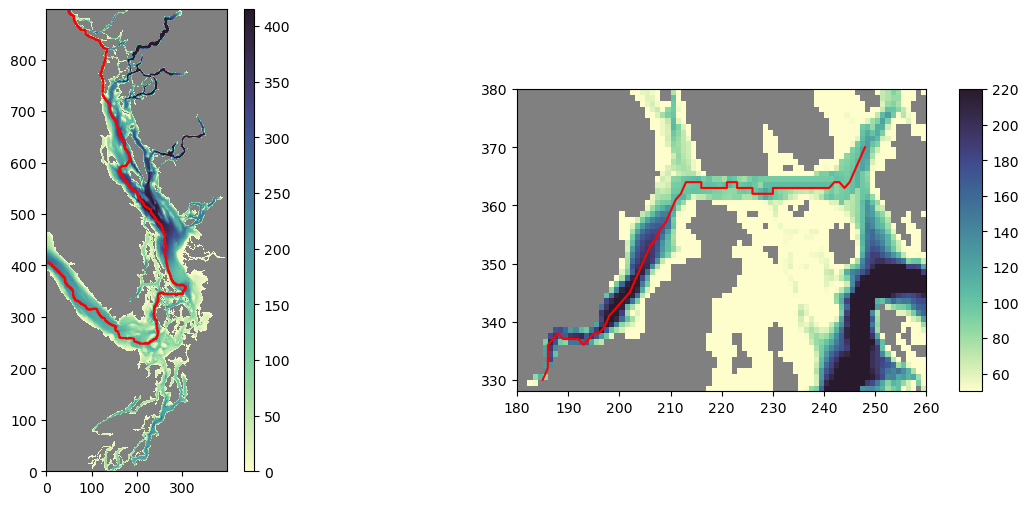

In [10]:
from mpl_toolkits.axes_grid1 import make_axes_locatable


fig, ax = plt.subplots(1, 2, figsize=(14, 6))
mycmap = cm.deep
mycmap.set_bad('grey')
im = ax[0].pcolormesh(bathyb.variables['Bathymetry'][:], cmap=mycmap, vmin=0, vmax=415)
ax[0].plot(thalweg_pts0[:,1],thalweg_pts0[:,0],color='r')
im2 = ax[1].pcolormesh(bathyb.variables['Bathymetry'][:], cmap=mycmap, vmin=50, vmax=220)
ax[1].plot(thalweg_pts[:,1],thalweg_pts[:,0],color='r')
viz_tools.set_aspect(ax[0]);
viz_tools.set_aspect(ax[1]);
#ax[0].set_xlim([180, 260])
#ax[0].set_ylim([328, 380])
ax[1].set_xlim([180, 260])
ax[1].set_ylim([328, 380])
divider = make_axes_locatable(ax[0])
divider2 = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
cax2 = divider2.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')
fig.colorbar(im2, cax=cax2, orientation='vertical')


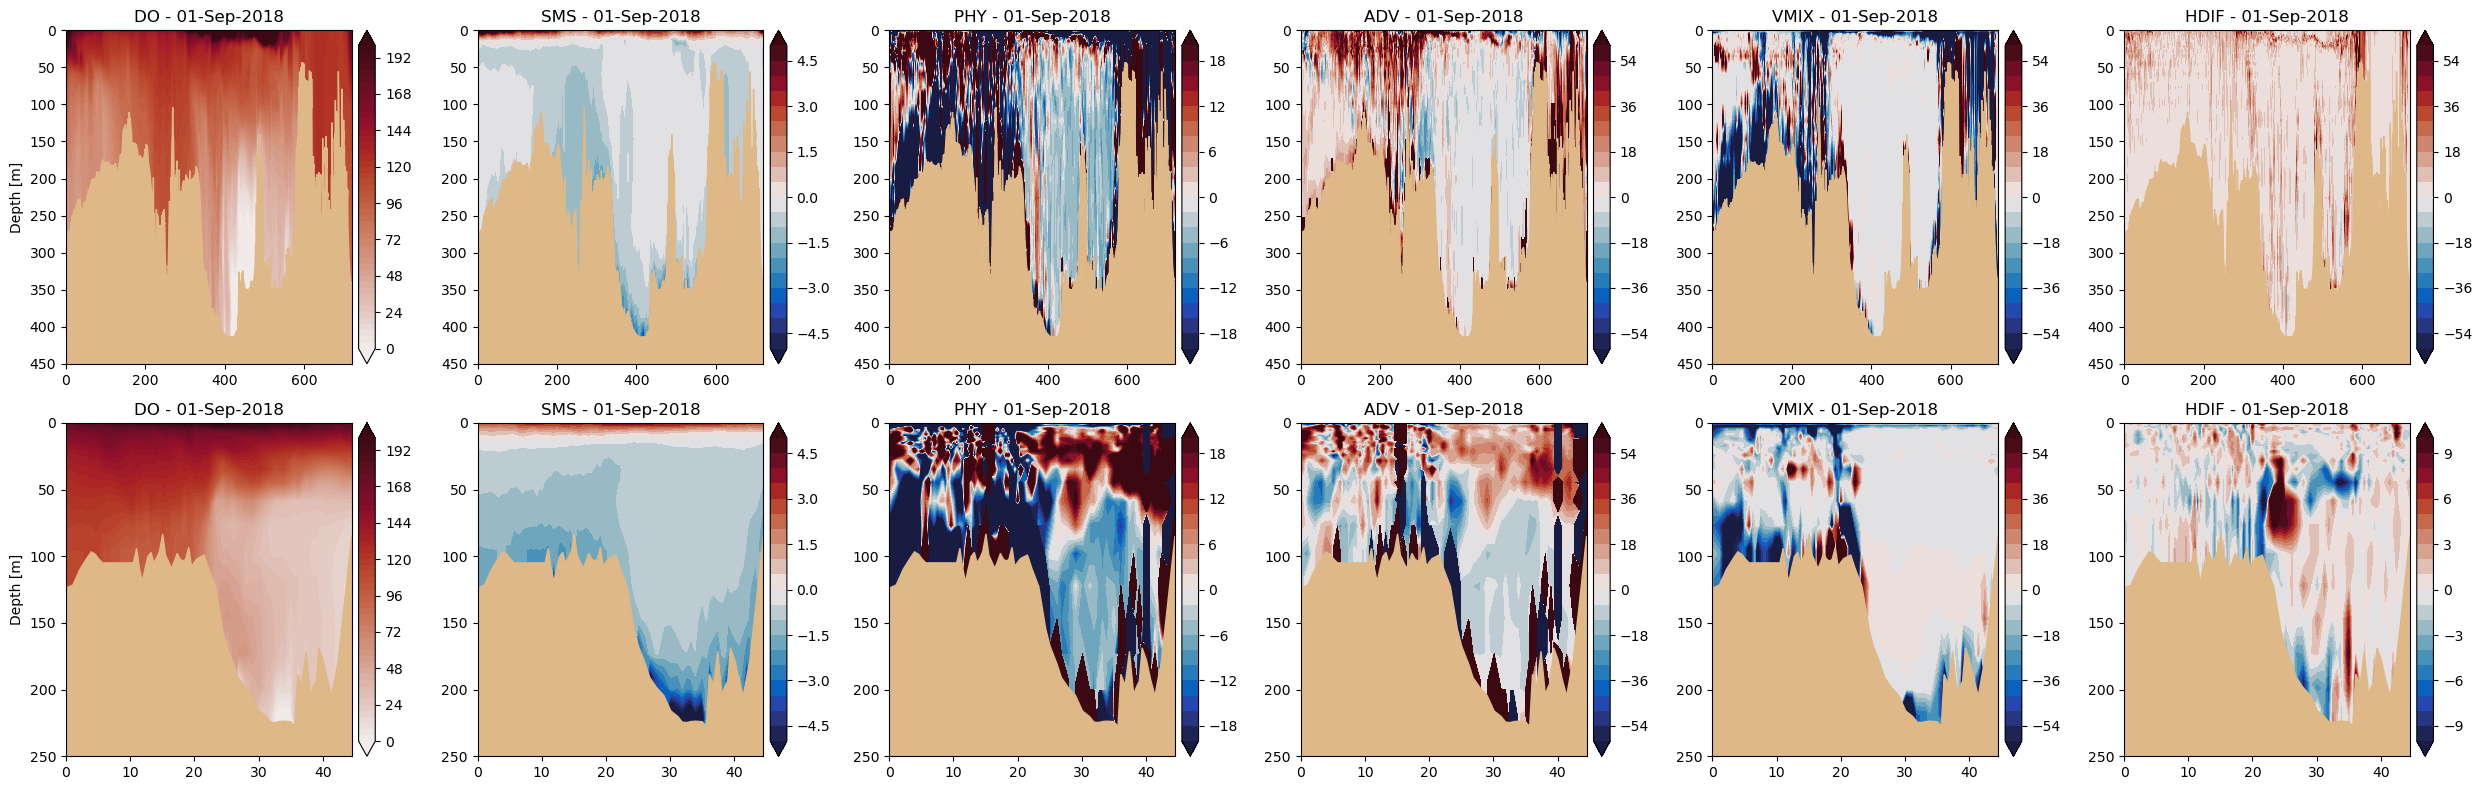

In [12]:
fig, axs = plt.subplots(2, 6, figsize=(25, 8))
lp, cpoxy, cpsms, cpdyn, cpadv, cpmix, cpdif = 0, 0, 1, 2, 3, 4, 5
Month = list(['01-Sep-2018','02-Sep-2018'])
t0=10
for month in range(t0, t0+1):
    dep_thal0, distance0, oxy_thal0 = vis.load_thalweg(
                depthb[0, ...], np.array(df_chemnewb.dissolved_oxygen[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts0)
    dep_thal0, distance0, sms_thal0 = vis.load_thalweg(
                depthb[0, ...], np.array(SMSd[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts0)
    dep_thal0, distance0, adv_thal0 = vis.load_thalweg(
                depthb[0, ...], np.array(ADVd[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts0)
    dep_thal0, distance0, mix_thal0 = vis.load_thalweg(
                depthb[0, ...], np.array(VMIXd[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts0)
    dep_thal0, distance0, dif_thal0 = vis.load_thalweg(
                depthb[0, ...], np.array(HDIFd[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts0)
    dep_thal, distance, oxy_thal = vis.load_thalweg(
                depthb[0, ...], np.array(df_chemnewb.dissolved_oxygen[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts)
    dep_thal, distance, sms_thal = vis.load_thalweg(
                depthb[0, ...], np.array(SMSd[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts)
    dep_thal, distance, adv_thal = vis.load_thalweg(
                depthb[0, ...], np.array(ADVd[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts)
    dep_thal, distance, mix_thal = vis.load_thalweg(
                depthb[0, ...], np.array(VMIXd[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts)
    dep_thal, distance, dif_thal = vis.load_thalweg(
                depthb[0, ...], np.array(HDIFd[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts)
    dif_plot0 = vis._fill_in_bathy(dif_thal0, meshb, thalweg_pts0)
    mix_plot0 = vis._fill_in_bathy(mix_thal0, meshb, thalweg_pts0)
    sms_plot0 = vis._fill_in_bathy(sms_thal0, meshb, thalweg_pts0)
    dyn_plot0 = vis._fill_in_bathy(adv_thal0+mix_plot0+dif_plot0, meshb, thalweg_pts0)
    adv_plot0 = vis._fill_in_bathy(adv_thal0, meshb, thalweg_pts0)
    oxy_plot0 = vis._fill_in_bathy(oxy_thal0, meshb, thalweg_pts0)
    dif_plot = vis._fill_in_bathy(dif_thal, meshb, thalweg_pts)
    mix_plot = vis._fill_in_bathy(mix_thal, meshb, thalweg_pts)
    sms_plot = vis._fill_in_bathy(sms_thal, meshb, thalweg_pts)
    dyn_plot = vis._fill_in_bathy(adv_thal+mix_plot+dif_plot, meshb, thalweg_pts)
    adv_plot = vis._fill_in_bathy(adv_thal, meshb, thalweg_pts)
    oxy_plot = vis._fill_in_bathy(oxy_thal, meshb, thalweg_pts)
    colours_oxy0 = axs[lp,cpoxy].contourf(distance0, dep_thal0, oxy_plot0, np.linspace(0, 200, 51),                                     
                                    cmap=cm.amp, extend='both')
    colours_sms0 = axs[lp,cpsms].contourf(distance0, dep_thal0, sms_plot0, np.linspace(-5, 5, 21), 
                                     cmap=cm.balance, extend='both')
    colours_dyn0 = axs[lp,cpdyn].contourf(distance0, dep_thal0, dyn_plot0, np.linspace(-20, 20, 21), 
                                     cmap=cm.balance, extend='both')
    colours_adv0 = axs[lp,cpadv].contourf(distance0, dep_thal0, adv_plot0, np.linspace(-60, 60, 21), 
                                     cmap=cm.balance, extend='both')
    colours_mix0 = axs[lp,cpmix].contourf(distance0, dep_thal0, mix_plot0, np.linspace(-60, 60, 21), 
                                     cmap=cm.balance, extend='both')
    colours_dif0 = axs[lp,cpdif].contourf(distance0, dep_thal0, dif_plot0, np.linspace(-10, 10, 21), 
                                     cmap=cm.balance, extend='both')
    colours_oxy = axs[lp+1,cpoxy].contourf(distance, dep_thal, oxy_plot, np.linspace(0, 200, 51),                                     
                                    cmap=cm.amp, extend='both')
    colours_sms = axs[lp+1,cpsms].contourf(distance, dep_thal, sms_plot, np.linspace(-5, 5, 21), 
                                     cmap=cm.balance, extend='both')
    colours_dyn = axs[lp+1,cpdyn].contourf(distance, dep_thal, dyn_plot, np.linspace(-20, 20, 21), 
                                     cmap=cm.balance, extend='both')
    colours_adv = axs[lp+1,cpadv].contourf(distance, dep_thal, adv_plot, np.linspace(-60, 60, 21), 
                                     cmap=cm.balance, extend='both')
    colours_mix = axs[lp+1,cpmix].contourf(distance, dep_thal, mix_plot, np.linspace(-60, 60, 21), 
                                     cmap=cm.balance, extend='both')
    colours_dif = axs[lp+1,cpdif].contourf(distance, dep_thal, dif_plot, np.linspace(-10, 10, 21), 
                                     cmap=cm.balance, extend='both')

    vis._add_bathy_patch(
    distance0, bathyb['Bathymetry'][:], thalweg_pts0, axs[lp,cpoxy], color='burlywood')
    vis._add_bathy_patch(
    distance0, bathyb['Bathymetry'][:], thalweg_pts0, axs[lp,cpsms], color='burlywood')
    vis._add_bathy_patch(
    distance0, bathyb['Bathymetry'][:], thalweg_pts0, axs[lp,cpdyn], color='burlywood')
    vis._add_bathy_patch(
    distance0, bathyb['Bathymetry'][:], thalweg_pts0, axs[lp,cpadv], color='burlywood')
    vis._add_bathy_patch(
    distance0, bathyb['Bathymetry'][:], thalweg_pts0, axs[lp,cpmix], color='burlywood')
    vis._add_bathy_patch(
    distance0, bathyb['Bathymetry'][:], thalweg_pts0, axs[lp,cpdif], color='burlywood')
    vis._add_bathy_patch(
    distance, bathyb['Bathymetry'][:], thalweg_pts, axs[lp+1,cpoxy], color='burlywood')
    vis._add_bathy_patch(
    distance, bathyb['Bathymetry'][:], thalweg_pts, axs[lp+1,cpsms], color='burlywood')
    vis._add_bathy_patch(
    distance, bathyb['Bathymetry'][:], thalweg_pts, axs[lp+1,cpdyn], color='burlywood')
    vis._add_bathy_patch(
    distance, bathyb['Bathymetry'][:], thalweg_pts, axs[lp+1,cpadv], color='burlywood')
    vis._add_bathy_patch(
    distance, bathyb['Bathymetry'][:], thalweg_pts, axs[lp+1,cpmix], color='burlywood')
    vis._add_bathy_patch(
    distance, bathyb['Bathymetry'][:], thalweg_pts, axs[lp+1,cpdif], color='burlywood')
    axs[lp,cpoxy].invert_yaxis()
    axs[lp,cpsms].invert_yaxis()
    axs[lp,cpdyn].invert_yaxis()
    axs[lp,cpadv].invert_yaxis()
    axs[lp,cpmix].invert_yaxis()
    axs[lp,cpdif].invert_yaxis()
    axs[lp+1,cpoxy].invert_yaxis()
    axs[lp+1,cpsms].invert_yaxis()
    axs[lp+1,cpdyn].invert_yaxis()
    axs[lp+1,cpadv].invert_yaxis()
    axs[lp+1,cpmix].invert_yaxis()
    axs[lp+1,cpdif].invert_yaxis()
    axs[lp,cpoxy].set_ylim(450, 0)
    axs[lp,cpsms].set_ylim(450, 0)
    axs[lp,cpdyn].set_ylim(450, 0)
    axs[lp,cpadv].set_ylim(450, 0)
    axs[lp,cpmix].set_ylim(450, 0)
    axs[lp,cpdif].set_ylim(450, 0)
    axs[lp+1,cpoxy].set_ylim(250, 0)
    axs[lp+1,cpsms].set_ylim(250, 0)
    axs[lp+1,cpdyn].set_ylim(250, 0)
    axs[lp+1,cpadv].set_ylim(250, 0)
    axs[lp+1,cpmix].set_ylim(250, 0)
    axs[lp+1,cpdif].set_ylim(250, 0)
    axs[lp,cpoxy].set_ylabel('Depth [m]');
    axs[lp+1,cpoxy].set_ylabel('Depth [m]');
    axs[lp,cpoxy].set_title(f'DO - {Month[month-t0]}')
    axs[lp,cpsms].set_title(f'SMS - {Month[month-t0]}')
    axs[lp,cpdyn].set_title(f'PHY - {Month[month-t0]}')
    axs[lp,cpadv].set_title(f'ADV - {Month[month-t0]}')
    axs[lp,cpmix].set_title(f'VMIX - {Month[month-t0]}')
    axs[lp,cpdif].set_title(f'HDIF - {Month[month-t0]}')
    axs[lp+1,cpoxy].set_title(f'DO - {Month[month-t0]}')
    axs[lp+1,cpsms].set_title(f'SMS - {Month[month-t0]}')
    axs[lp+1,cpdyn].set_title(f'PHY - {Month[month-t0]}')
    axs[lp+1,cpadv].set_title(f'ADV - {Month[month-t0]}')
    axs[lp+1,cpmix].set_title(f'VMIX - {Month[month-t0]}')
    axs[lp+1,cpdif].set_title(f'HDIF - {Month[month-t0]}')
    cbar = fig.colorbar(colours_oxy0, ax=axs[lp,cpoxy], pad=0.02)
    cbar = fig.colorbar(colours_sms0, ax=axs[lp,cpsms], pad=0.02)
    cbar = fig.colorbar(colours_dyn0, ax=axs[lp,cpdyn], pad=0.02)
    cbar = fig.colorbar(colours_adv0, ax=axs[lp,cpadv], pad=0.02)
    cbar = fig.colorbar(colours_mix0, ax=axs[lp,cpmix], pad=0.02)
    cbar = fig.colorbar(colours_mix0, ax=axs[lp,cpdif], pad=0.02)
    cbar = fig.colorbar(colours_oxy, ax=axs[lp+1,cpoxy], pad=0.02)
    cbar = fig.colorbar(colours_sms, ax=axs[lp+1,cpsms], pad=0.02)
    cbar = fig.colorbar(colours_dyn, ax=axs[lp+1,cpdyn], pad=0.02)
    cbar = fig.colorbar(colours_adv, ax=axs[lp+1,cpadv], pad=0.02)
    cbar = fig.colorbar(colours_mix, ax=axs[lp+1,cpmix], pad=0.02)
    cbar = fig.colorbar(colours_dif, ax=axs[lp+1,cpdif], pad=0.02)
    #lp = lp + 1;
fig.tight_layout(); 